# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [4]:
## Data loading
data_name = 'xgb_all_data'
seq_len = 24

ori_data, scaler= real_data_loading(data_name, seq_len, mix=True)
ori_data=ori_data[:5]

print(data_name + ' dataset is ready.')

xgb_all_data dataset is ready.


In [5]:
np.array(ori_data).shape

(5, 24, 100)

In [6]:
np.array(ori_data)[0].shape

(24, 100)

## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [9]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'lstm' 
parameters['hidden_dim'] = 6
parameters['num_layer'] = 3
parameters['iterations'] = 10
parameters['batch_size'] = 2

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [10]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')

np.array(P).shape (5, 24, 20)
np.array(Q).shape (5, 100, 20)
HHHHHH (?, 24, 6)
X_tildeX_tildeX_tilde (?, 24, 20)
E_hatE_hatE_hat (?, 24, 6)
H_hatH_hatH_hat (?, 24, 6)
H_hat_superviseH_hat_superviseH_hat_supervise (?, 24, 6)
X_hatX_hatX_hat (?, 24, 20)
X_hatX_hatX_hatX_hatX_hatX_hatX_hatX_hat1 (?, 24, 100)
Y_fakeY_fakeY_fake (?, 24, 1)
Y_realY_realY_real (?, 24, 1)
Y_fake_eY_fake_eY_fake_e (?, 24, 1)
Start Embedding Network Training
step: 0/10, e_loss: 0.5118
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10, s_loss: 0.027
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10, d_loss: 2.0821, g_loss_u: 0.6913, g_loss_s: 0.0156, g_loss_v: 0.4999, e_loss_t0: 0.5013
Finish Joint Training
Finish Synthetic Data Generation


In [8]:
generated_data.shape

(481, 24, 100)

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [9]:
metric_iteration = 10

discriminative_score = list()
for _ in range(metric_iteration):
    temp_disc = discriminative_score_metrics(ori_data, generated_data)
    discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.5


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [10]:
predictive_score = list()
for tt in range(metric_iteration):
    temp_pred = predictive_score_metrics(ori_data, generated_data)
    predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

Predictive score: 0.4488


In [11]:
df = pd.read_csv('./data/'+data_name+'.csv')
cols_all = df.columns.to_list()

In [12]:
len(cols_all)

100

In [13]:
#ori_data[0][:,0]

In [14]:
#ori_data[0:2]

In [15]:
#np.hstack([item[:,0] for item in ori_data[0:20]])

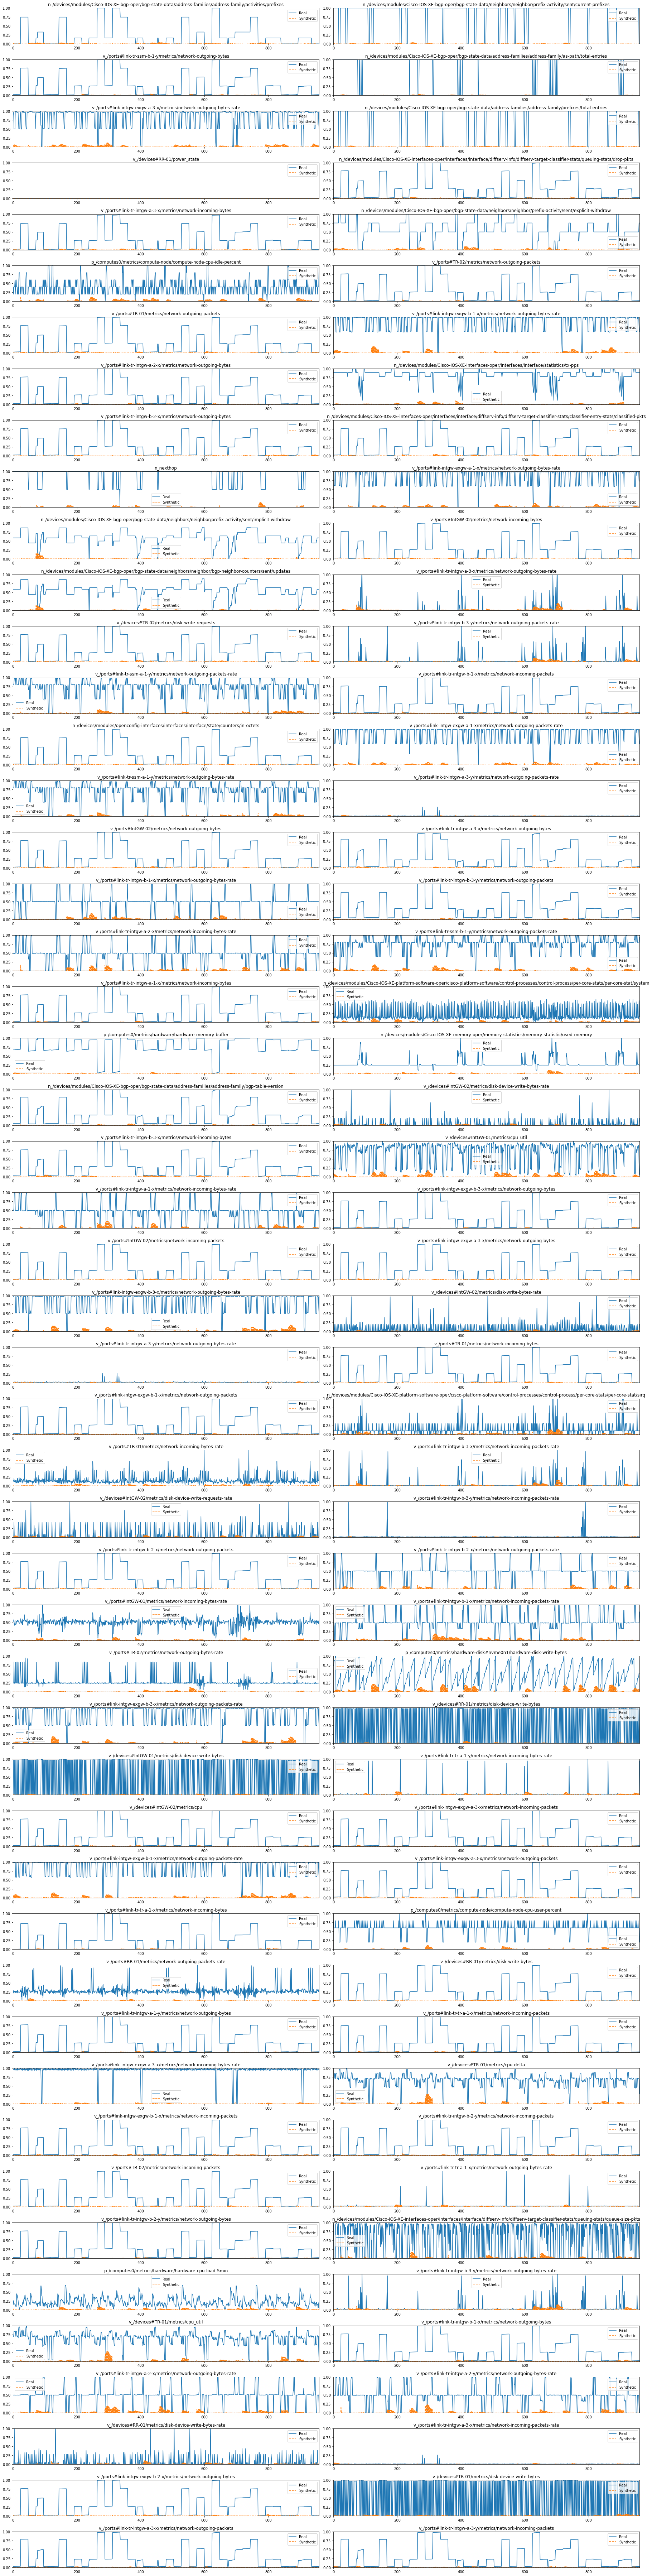

In [16]:
import matplotlib.pyplot as plt

# Plotting some generated samples. Both Synthetic and Original data are still standardized with values between [0, 1]
fig, axes = plt.subplots(nrows=50, ncols=2, figsize=(25, 100))
axes=axes.flatten()

time = list(range(1,50))
obs = 0 #np.random.randint(len(ori_data))

for j, col in enumerate(cols_all):
    df = pd.DataFrame({'Real': np.hstack([item[:, j] for item in ori_data[obs:obs+40]]), # ori_data[obs][:, j],
                   'Synthetic': np.hstack([item[:, j] for item in generated_data[obs:obs+40]]) }) # generated_data[obs][:, j]})
    df.plot(ax=axes[j], ylim=(0,1),
            title=col,
            secondary_y='Synthetic data', style=['-', '--'])
fig.tight_layout()

## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

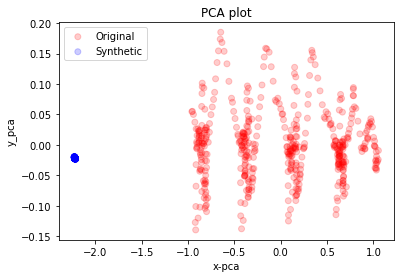

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 962 samples in 0.000s...
[t-SNE] Computed neighbors for 962 samples in 0.261s...
[t-SNE] Computed conditional probabilities for sample 962 / 962
[t-SNE] Mean sigma: 0.001283
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.347458
[t-SNE] KL divergence after 300 iterations: 0.519200


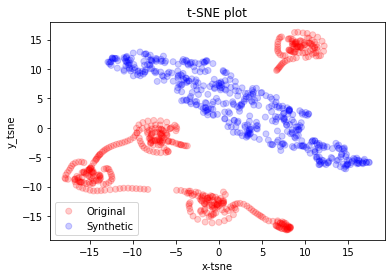

In [17]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

In [18]:
generated_data.shape

(481, 24, 100)

In [19]:
print(len(ori_data), len(ori_data[0]))

481 24


# reshape data

In [20]:
g_data = np.reshape(generated_data, (generated_data.shape[0] * generated_data.shape[1], generated_data.shape[2]))

In [21]:
g_data = scaler.inverse_transform(g_data)

In [22]:
g_data[0]

array([ 1.66439084e+06,  7.83500813e+03,  1.37620310e+13,  3.08814870e+03,
        7.57248142e+04,  7.83499676e+03,  1.00000000e+00,  3.79950205e+07,
        1.72896820e+08,  4.05161016e+00,  6.17695751e+01,  1.22218615e+07,
        1.47038392e+07,  6.29590728e+04,  1.82432146e+13,  4.47607843e+01,
        1.83586357e+13,  1.59173598e+08,  3.97048092e+00,  2.98545949e+04,
        2.18736575e+03,  1.48461008e+10,  8.95101228e+03,  1.27851736e+02,
        3.90852981e+05, -6.43866776e-02, -3.13204302e+02,  5.77222832e+09,
        1.75283040e+10,  3.54191102e+01, -3.73327555e+05, -2.94415279e-01,
        2.49899476e+11,  3.13378526e+08, -1.73355613e+05,  1.78649551e+06,
       -2.97240434e+05,  4.79286862e+02,  7.00110179e+12,  8.93106563e-01,
        7.11292907e+05,  3.57925204e+08,  7.86921293e+05,  5.14743170e+00,
        1.75989868e+08,  5.34316182e+01, -3.51982363e+05,  3.32348658e+12,
        2.18467934e+08,  3.35097448e+12,  4.10604163e+04,  3.22578654e+01,
        5.72067052e+00,  

In [23]:
df_generated = pd.DataFrame(g_data)

In [24]:
df_generated.head()

0            1             2            3             4   \
0  1.664391e+06  7835.008131  1.376203e+13  3088.148702  75724.814150   
1  1.663763e+06  7834.999977  1.378140e+13  3113.921697   -222.026094   
2  1.663930e+06  7835.003855  1.378677e+13  3080.690909  43230.779893   
3  1.663766e+06  7834.999892  1.378123e+13  3113.586997    109.129782   
4  1.663848e+06  7835.006010  1.378178e+13  3079.804302  75807.747842   

            5    6             7             8         9   ...         90  \
0  7834.996765  1.0  3.799502e+07  1.728968e+08  4.051610  ...  39.970268   
1  7834.999894  1.0  3.649780e+07  1.729932e+08  4.001032  ...  41.062087   
2  7835.005108  1.0  3.758178e+07  1.730484e+08  4.161965  ...  40.425048   
3  7834.999988  1.0  3.650775e+07  1.729930e+08  4.002388  ...  41.056489   
4  7835.011018  1.0  3.730661e+07  1.730535e+08  4.152425  ...  40.243003   

             91             92             93         94        95  \
0  1.902337e+13 -235572.275248 -329954.642186  -2.698570  0.288325   
1  1.902512e+13    -383.446616   -3000.728959   0.180570  0.001050   
2  1.902823e+13 -113639.541627 -185112.038431   3.770991  0.512731   
3  1.902507e+13   -1077.089588   -3559.305298   0.179619  0.006398   
4  1.902769e+13 -157552.763003 -266239.932686 -12.321818  0.569682   

             96            97            98            99  
0  2.882789e+12 -4.912464e+07  1.919937e+06  1.927500e+06  
1  2.873846e+12 -1.514974e+05  1.920500e+06  1.923682e+06  
2  2.875274e+12  3.711774e+06  1.919800e+06  1.927144e+06  
3  2.873909e+12 -6.588118e+04  1.920492e+06  1.923720e+06  
4  2.871854e+12  1.822286e+07  1.918981e+06  1.928252e+06  

[5 rows x 100 columns]

In [25]:
df_generated.shape

(11544, 100)

In [26]:
df_ori = pd.read_csv('./data/'+data_name+'.csv')

In [27]:
df_ori.shape

(505, 100)

In [28]:
df_generated.columns = df_ori.columns

In [29]:
# df_generated = df_generated.astype(int)

In [30]:
df_generated.head()

n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes  \
0                                       1.664391e+06                                                             
1                                       1.663763e+06                                                             
2                                       1.663930e+06                                                             
3                                       1.663766e+06                                                             
4                                       1.663848e+06                                                             

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes  \
0                                        7835.008131                                                                  
1                                        7834.999977                                                                  
2                                        7835.003855                                                                  
3                                        7834.999892                                                                  
4                                        7835.006010                                                                  

   v_/ports#link-tr-ssm-b-1-y/metrics/network-outgoing-bytes  \
0                                       1.376203e+13           
1                                       1.378140e+13           
2                                       1.378677e+13           
3                                       1.378123e+13           
4                                       1.378178e+13           

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries  \
0                                        3088.148702                                                               
1                                        3113.921697                                                               
2                                        3080.690909                                                               
3                                        3113.586997                                                               
4                                        3079.804302                                                               

   v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-bytes-rate  \
0                                       75724.814150                    
1                                        -222.026094                    
2                                       43230.779893                    
3                                         109.129782                    
4                                       75807.747842                    

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries  \
0                                        7834.996765                                                                
1                                        7834.999894                                                                
2                                        7835.005108                                                                
3                                        7834.999988                                                                
4                                        7835.011018                                                                

   v_/devices#RR-01/power_state  \
0                           1.0   
1                           1.0   
2                           1.0   
3                           1.0   
4                           1.0   

   n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/diffserv-info/diffserv-target-classifier-stats/queuing-stats/drop-pkts  \
0                     

In [31]:
df_final = pd.DataFrame(df_generated)
print(df_final.shape)

(11544, 100)


In [32]:
# df_generated.dtypes
int_columns = df_final.columns
int_columns_list = int_columns.values.tolist()
# try:
# #     int_columns_list.remove('v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-bytes-rate')
# except:
#     print('not exist')

# try:
# #     int_columns_list.remove('v_/ports#link-intgw-exgw-b-1-x/metrics/network-outgoing-bytes-rate')
# except:
#     print('not exist')

# try:
# #     int_columns_list.remove('v_/ports#link-tr-intgw-b-3-y/metrics/network-outgoing-packets-rate')
# except:
#     print('not exist')

df_final[int_columns_list] = df_final[int_columns_list].astype('int64')
df_final.shape

(11544, 100)

In [33]:
df_final.head()

n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes  \
0                                            1664390                                                             
1                                            1663763                                                             
2                                            1663930                                                             
3                                            1663765                                                             
4                                            1663847                                                             

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes  \
0                                               7835                                                                  
1                                               7834                                                                  
2                                               7835                                                                  
3                                               7834                                                                  
4                                               7835                                                                  

   v_/ports#link-tr-ssm-b-1-y/metrics/network-outgoing-bytes  \
0                                     13762030962072           
1                                     13781398217104           
2                                     13786770552910           
3                                     13781230963660           
4                                     13781780589814           

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries  \
0                                               3088                                                               
1                                               3113                                                               
2                                               3080                                                               
3                                               3113                                                               
4                                               3079                                                               

   v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-bytes-rate  \
0                                              75724                    
1                                               -222                    
2                                              43230                    
3                                                109                    
4                                              75807                    

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries  \
0                                               7834                                                                
1                                               7834                                                                
2                                               7835                                                                
3                                               7834                                                                
4                                               7835                                                                

   v_/devices#RR-01/power_state  \
0                             1   
1                             1   
2                             1   
3                             1   
4                             1   

   n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/diffserv-info/diffserv-target-classifier-stats/queuing-stats/drop-pkts  \
0                     

In [34]:
df_final.to_csv('./data/generated_data.csv', index=False)

# 查看数据分布

In [ ]:
df_final.hist(figsize=(30,20))

In [ ]:
df_ori.hist(figsize=(30,20))

In [ ]:
df_final.describe()

In [ ]:
df_ori.describe()

In [36]:
df_ori = pd.read_csv('./data/stock_data.csv')
df_generate = pd.read_csv('./data/generated_data.csv')

In [37]:
print('df_ori:', df_ori.shape)
print('df_generate:', df_generate.shape)

df_ori: (3685, 6)
df_generate: (11544, 30)


In [38]:
df_ori.head()

Open       High        Low      Close  Adj_Close    Volume
0  49.676899  51.693783  47.669952  49.845802  49.845802  44994500
1  50.178635  54.187561  49.925285  53.805050  53.805050  23005800
2  55.017166  56.373344  54.172661  54.346527  54.346527  18393200
3  55.260582  55.439419  51.450363  52.096165  52.096165  15361800
4  52.140873  53.651051  51.604362  52.657513  52.657513   9257400

In [39]:
df_generate.head()

n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/total-memory  \
0                                           11128015                                                      
1                                           11188469                                                      
2                                           11188806                                                      
3                                           11188821                                                      
4                                           11188817                                                      

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes  \
0                                            1664484                                                             
1                                            1663947                                                             
2                                            1663926                                                             
3                                            1663919                                                             
4                                            1663932                                                             

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes  \
0                                               7835                                                                  
1                                               7835                                                                  
2                                               7835                                                                  
3                                               7835                                                                  
4                                               7836                                                                  

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/memory-usage  \
0                                            1943327                                                               
1                                            1943327                                                               
2                                            1943327                                                               
3                                            1943327                                                               
4                                            1943328                                                               

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/path/total-entries  \
0                                              23215                                                            
1                                              23466                                                            
2                                              23474                                                            
3                                              23475                                                            
4                                              23476                                                            

   n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries  \
0                                               7835                                                                
1                                               7835                                                                
2                                               7835                                                                
3                                               7835                                                                